In [21]:
import SIMSIToolBox
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.dpi'] = 200
import os
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from copy import deepcopy

In [22]:
datadir = "X:/MSI_Shared_Data/13CImagingManuscript/raw_data/imzmls/subset_data/NA_corrected_data/manuscript_figs/figureS2/"

In [23]:
formula = "C6H8NO5"
polarity="negative"
num_cores=1
ppmThresh = 50
colormap = "CMRmap" #coloring for images, see https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html

colormap = LinearSegmentedColormap.from_list("test",colors=["black", "navy","blue","cyan","yellow","orange","orangered","red","mistyrose","white"],N=256)


def cmap_custom(val,alpha,minim,maxim):
    
    val_norm = (val - minim) / (maxim - minim)
    
    #rgba mapping
    r = interp1d([0,.5,1.0],[0,.5,1.0])
    g = interp1d([0,.5,1.0],[0.0,0.0,0.0])
    b = interp1d([0,.5,1.0],[0.0,0.0,0.0])
    
    return (r(val_norm),g(val_norm),b(val_norm),alpha)

def apply_cmap(arr,alpha):
    sh = arr.shape
    arr = arr.flatten()
    minim = np.min(arr)
    maxim = np.max(arr)
    arr = np.array([cmap_custom(x,alpha,minim,maxim) for x in arr])
    arr = arr.reshape(list(sh) + [arr.shape[1]])
    return arr



In [24]:
files = [x for x in os.listdir(datadir) if ".csv" in x]
files

['20201113_01_170w250h_13CtumorBrain2_009115H_03 Analyte 6_1.csv',
 '20210223_02_100w120h_13CtumorBrain2_009109H_01 009109H_1.csv',
 '20210223_03_100w120h_13CtumorBrain2_009108H_01 009108H_1.csv']

In [26]:
datas = []
m0Mz,mzsOI,numCarbons = SIMSIToolBox.getMzsOfIsotopologues(formula,elementOfInterest="C")
for file in files:
    msi = SIMSIToolBox.MSIData(mzsOI,ppm=ppmThresh,numCores = num_cores,intensityCutoff=0)
    df = pd.read_csv(datadir + file,index_col=0)
    msi.from_pandas(df,polarity)
    datas.append(msi)

In [28]:
#calculation labeling pattern images and save result
iso_tensors = [SIMSIToolBox.normalizeTensor(msi.data_tensor) for msi in datas]


(250, 170)
(120, 100)
(120, 100)


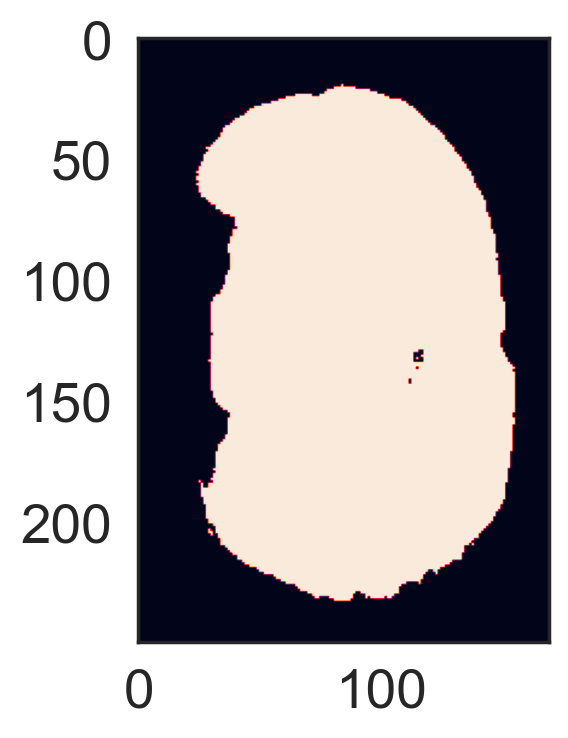

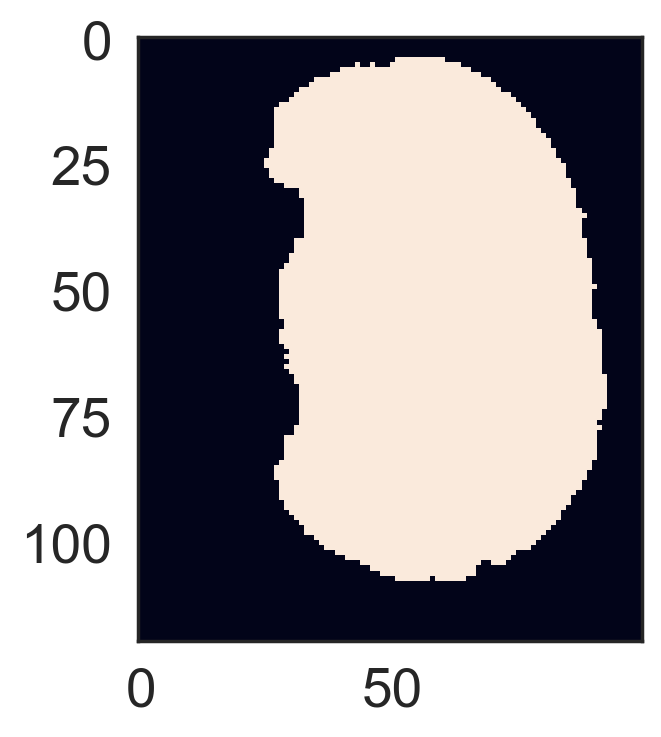

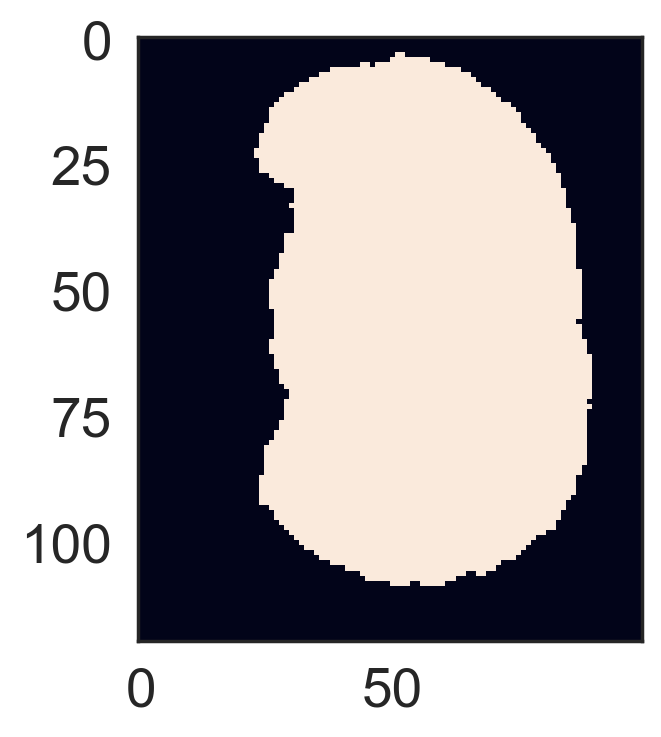

In [30]:
for iso_tensor in iso_tensors:
    plt.figure()
    plt.imshow(iso_tensor.sum(axis=0))
    print(iso_tensor.sum(axis=0).shape)


In [39]:
sb.set_theme(style="white",font_scale=1.8)

def extractLabelingPattern(data,xmin,xmax,ymin,ymax,background):
    roi = []
    for x in range(xmin,xmax):
        for y in range(ymin,ymax):
            if background[x,y] > .5:
                roi.append(data[:,x,y])
    roi = np.array(roi)
    
    return roi.mean(axis=0)


xmins = [0,0,0]
xmaxs = [120,60,60]
ymins = [0,0,0]
ymaxs = [170,100,100]

patterns = np.array([extractLabelingPattern(iso_tensors[x],xmins[x],xmaxs[x],ymins[x],ymaxs[x],datas[x].imageBoundary) for x in range(len(datas))])
print(patterns.mean(axis=0))
print(patterns.std(axis=0))

[0.13940397 0.03952899 0.0459624  0.08221971 0.15762005 0.21175513
 0.32347711]
[0.00535355 0.00251025 0.00597419 0.00475794 0.00540509 0.00036583
 0.01392788]
